In [1]:
import pandas as pd
import tensorflow as tf
physcial_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physcial_devices[0],True)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model


2021-10-27 00:58:40.028561: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-27 00:58:40.898827: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-27 00:58:40.899359: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-27 00:58:40.929245: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-27 00:58:40.929814: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.2GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 244.97GiB/s
2021-10-27 00:58:40.929848: I tensorflow/stream_executor/platform/default/dso

In [2]:
# from google.colab import files 
# uploaded = files.upload()

In [3]:
train = pd.read_csv('sign_mnist_train.csv.zip')
test = pd.read_csv('sign_mnist_test.csv.zip')

In [4]:
#class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [5]:
df = pd.concat([train, test], ignore_index=True)
df.head()
X = df.loc[:,df.columns!='label']
y = df['label']

from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size=.2,random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size=.2, random_state=3)

In [6]:
X_train =np.array(X_train,dtype='float32')
X_val =np.array(X_val,dtype='float32')

X_test =np.array(X_test,dtype='float32')

# X_train = train_data[:,1:]/255
# X_test = test_data[:,1:]/255

#X_train = train_data[:,1:]
#X_test = test_data[:,1:]

y_train = pd.get_dummies(pd.DataFrame(y_train,columns=['label']).astype(str))
y_val = pd.get_dummies(pd.DataFrame(y_val,columns=['label']).astype(str))
y_test = pd.get_dummies(pd.DataFrame(y_test,columns=['label']).astype(str))




In [7]:
y_train = y_train[['label_'+str(i) for i in range(25) if i != 9]]
y_val = y_val[['label_'+str(i) for i in range(25) if i != 9]]
y_test = y_test[['label_'+str(i) for i in range(25) if i != 9]]

In [8]:
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

In [9]:
# y_train = np.array(pd.get_dummies(pd.DataFrame(y_train,columns=['label']).astype(str)))
# y_val = np.array(pd.get_dummies(pd.DataFrame(y_val,columns=['label']).astype(str)))
# y_test = np.array(pd.get_dummies(pd.DataFrame(y_test,columns=['label']).astype(str)))

In [10]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_val = X_val.reshape(X_val.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))


In [11]:
model = Sequential([
                    Rescaling(1/255, input_shape=X_train.shape[1:]),
                    Conv2D(32,3,activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.5),
                    Conv2D(64,3,activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.5),
                    Conv2D(128,3,activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.5),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(24,activation='softmax')




])

2021-10-27 00:58:43.388907: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-27 00:58:43.389095: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-27 00:58:43.389400: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.2GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 244.97GiB/s
2021-10-27 00:58:43.389424: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-27 00:58:43.389438: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-27 00:58:43.389446: I tensorflow/stream_executor/platform/default/

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0

In [13]:
tf.config.run_functions_eagerly(True)


In [14]:
from tensorflow.keras.callbacks import EarlyStopping
history = model.fit(X_train,y_train,batch_size=64,epochs=100,validation_data=(X_val,y_val),callbacks=[EarlyStopping(patience=2, monitor='val_loss')])

/home/roni/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
2021-10-27 00:58:43.927489: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-27 00:58:43.947427: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2894635000 Hz


Epoch 1/100


2021-10-27 00:58:43.971898: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2021-10-27 00:58:45.136175: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11


  1/347 [..............................] - ETA: 9:46 - loss: 3.2846 - accuracy: 0.0156

2021-10-27 00:58:45.461504: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


347/347 [==============================] - 8s 19ms/step - loss: 3.1240 - accuracy: 0.0601 - val_loss: 2.1103 - val_accuracy: 0.3819
Epoch 2/100
347/347 [==============================] - 6s 17ms/step - loss: 1.9924 - accuracy: 0.3706 - val_loss: 0.9680 - val_accuracy: 0.7246
Epoch 3/100
347/347 [==============================] - 6s 17ms/step - loss: 1.2107 - accuracy: 0.5952 - val_loss: 0.6091 - val_accuracy: 0.8197
Epoch 4/100
347/347 [==============================] - 6s 17ms/step - loss: 0.9253 - accuracy: 0.6870 - val_loss: 0.4060 - val_accuracy: 0.8964
Epoch 5/100
347/347 [==============================] - 6s 17ms/step - loss: 0.7471 - accuracy: 0.7397 - val_loss: 0.3094 - val_accuracy: 0.9280
Epoch 6/100
347/347 [==============================] - 6s 16ms/step - loss: 0.6519 - accuracy: 0.7720 - val_loss: 0.2360 - val_accuracy: 0.9506
Epoch 7/100
347/347 [==============================] - 6s 17ms/step - loss: 0.5675 - accuracy: 0.8048 - val_loss: 0.2097 - val_accuracy: 0.9484
Epoc

In [15]:
_,acc =model.evaluate(X_test,y_test)
print(f'Model accuracy: {acc}')

217/217 [==============================] - 2s 9ms/step - loss: 0.0152 - accuracy: 0.9988
Model accuracy: 0.9988449215888977


In [16]:
# from tensorflow import keras
# model = keras.models.load_model('Sign_language_CNN_model_final/')

In [17]:
y_pred = model.predict(X_test)
y_pred.shape

(6926, 24)

In [18]:
y_pred2 = np.argmax(y_pred, axis=1)
y_pred2.shape

(6926,)

In [19]:
y_test2 = np.argmax(y_test,axis=1)

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       272
           1       1.00      1.00      1.00       313
           2       1.00      1.00      1.00       312
           3       1.00      1.00      1.00       283
           4       1.00      1.00      1.00       274
           5       1.00      1.00      1.00       268
           6       0.99      1.00      1.00       309
           7       1.00      0.99      0.99       287
           8       1.00      1.00      1.00       274
           9       1.00      1.00      1.00       283
          10       1.00      1.00      1.00       283
          11       1.00      1.00      1.00       288
          12       1.00      0.99      0.99       292
          13       1.00      1.00      1.00       268
          14       1.00      1.00      1.00       275
          15       1.00      1.00      1.00       290
          16       1.00      1.00      1.00       282
          17       1.00    

In [21]:

model.save('Sign_language_CNN_model_final')

2021-10-27 01:01:33.947844: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: Sign_language_CNN_model_final/assets


In [22]:
X_test.shape


(6926, 28, 28, 1)

In [23]:
X_test_to_ship = X_test.reshape((X_test.shape[0],28*28))

In [24]:
X_test_to_ship.shape

(6926, 784)

In [25]:
y_test_to_ship = np.argmax(y_test, axis=1)

In [26]:
y_test_to_ship.shape

(6926,)

In [27]:
df_test_to_ship = pd.concat([pd.Series(y_test_to_ship,name='label'),pd.DataFrame(X_test_to_ship)],axis=1)

In [28]:
y_test

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

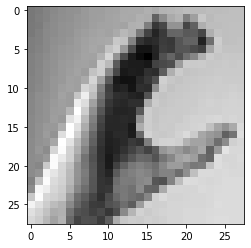

In [29]:
# pd.DataFrame(X_test_to_ship).iloc[0]
plt.imshow(pd.DataFrame(X_test_to_ship).iloc[0].to_numpy().reshape(28,28),cmap='gray')
plt.show()

In [30]:
pd.Series(y_test_to_ship,name='label')

0        2
1       18
2       18
3       22
4       10
        ..
6921     0
6922     0
6923     0
6924    14
6925    10
Name: label, Length: 6926, dtype: int64

In [31]:
# X_test.iloc[0].to_numpy().reshape(28,28)
# plt.imshow(X_test[y_test[:,12] == 1].reshape(28,28),cmap='gray')

ValueError: cannot reshape array of size 228928 into shape (28,28)

In [32]:
y_test[y_test[:,12] == 1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [33]:
df_for_demo = df_test_to_ship.groupby('label').sample(10)

In [34]:
df_for_demo.to_csv('test_data_for_demo.csv')

In [35]:
df_for_demo.shape

(240, 785)

In [36]:
X_train_to_ship = X_train.reshape((X_train.shape[0],28*28))

In [37]:
y_train_to_ship = np.argmax(y_train, axis=1)

In [38]:
df_train_to_ship = pd.concat([pd.Series(y_train_to_ship,name='label'),pd.DataFrame(X_train_to_ship)],axis=1)

In [39]:
pics_for_demo = df_train_to_ship.groupby('label').sample(1)

In [40]:
pics_for_demo.to_csv('pics_for_demo.csv')

# VISUALIZATION OF FILTERS

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0

(28, 28, 1)


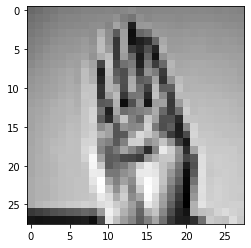

In [20]:
print(X_train[0].shape)
plt.imshow(X_train[0].reshape(28,28),cmap='gray')
plt.show()

In [21]:
layer_outputs = [layer.output for layer in model.layers[1:8]]

activation_model = Model(inputs=model.input,outputs=layer_outputs)


In [39]:
import cv2
img = cv2.imread('real_photo6.jpeg',cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))

In [40]:
# we take one picture and use the model
# activations = activation_model.predict(X_train[0].reshape(1,*(X_train[0].shape)))
activations = activation_model.predict(img.reshape(1,*(img.shape),1))

/home/roni/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


In [41]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 32)


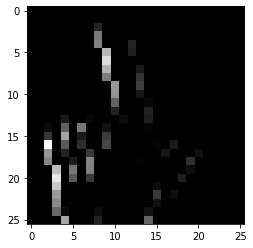

In [42]:
index= 30
plt.imshow(first_layer_activation[0,:,:,index],cmap='gray')

In [43]:
layer_names = []
for layer in model.layers[1:8]:
  layer_names.append(layer.name)
layer_names

['conv2d',
 'max_pooling2d',
 'dropout',
 'conv2d_1',
 'max_pooling2d_1',
 'dropout_1',
 'conv2d_2']

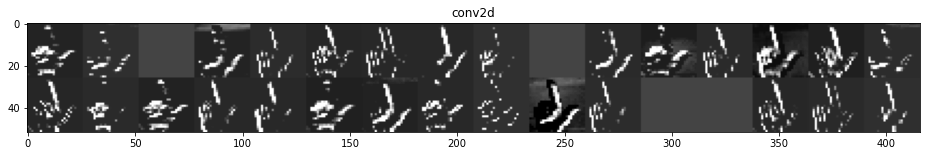

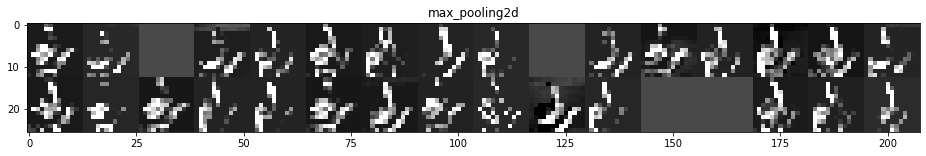

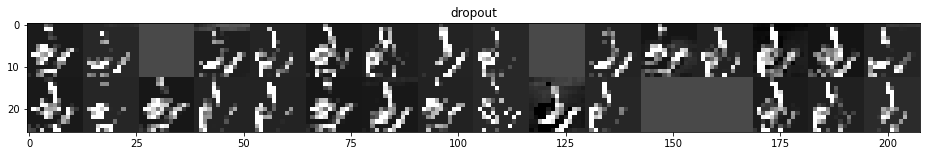

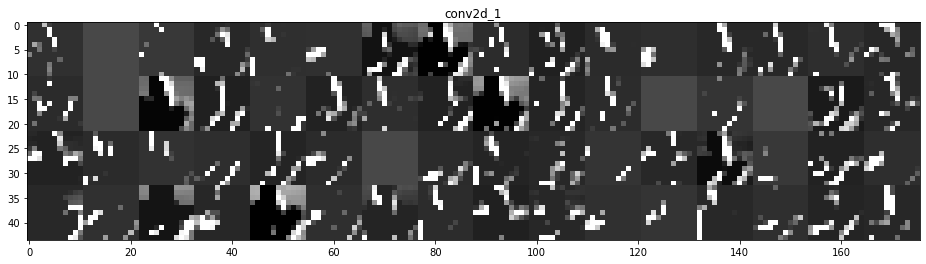

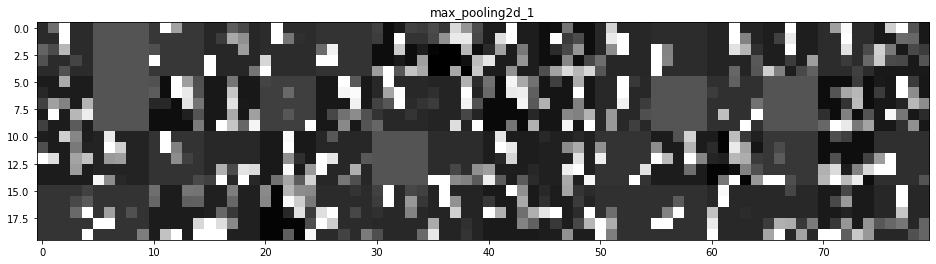

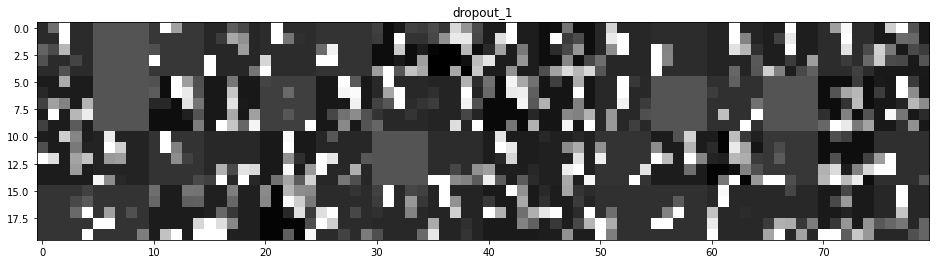

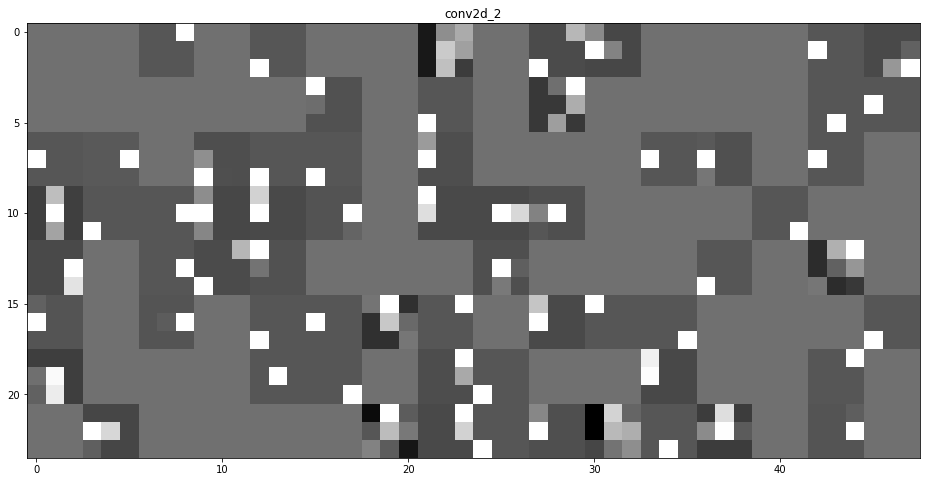

In [44]:
for layer_name, layer_activation in zip(layer_names,activations):
  n_features =layer_activation.shape[-1]
  size = layer_activation.shape[1]

  images_per_row = 16
  n_cols = n_features//images_per_row
  display_grid = np.zeros((size*n_cols, images_per_row*size))

  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0,:,:,col*images_per_row + row]

      channel_image -= channel_image.mean()
      channel_image /= (channel_image.std() + 0.0001)
      channel_image *=64
      channel_image +=128
      channel_image = np.clip(channel_image,0,255).astype('uint8')
      display_grid[col*size:(col+1)*size,row*size:(row+1)*size] = channel_image

  scale=1./size
  plt.figure(figsize=(scale*display_grid.shape[1],scale*display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto',cmap='gray')  


#THE END

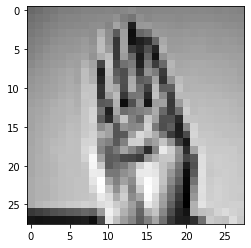

In [27]:
plt.imshow(X_train[0].reshape(28,28),cmap='gray')
plt.show()

In [31]:
y_train[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint8)

In [32]:
from sklearn.preprocessing import binarize
binarize(model.predict(X_train[0].reshape(1,28,28,1)),0.8)

/home/roni/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
/home/roni/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

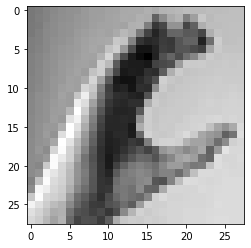

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


/home/roni/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
/home/roni/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


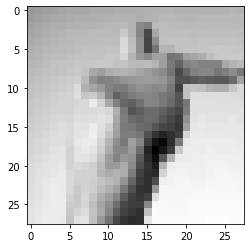

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


/home/roni/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
/home/roni/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


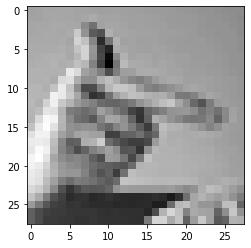

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


/home/roni/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
/home/roni/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


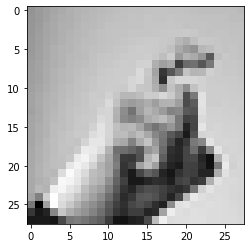

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


/home/roni/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
/home/roni/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


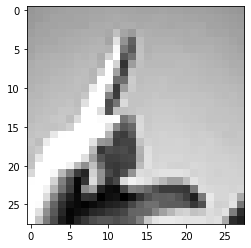

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/home/roni/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
/home/roni/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


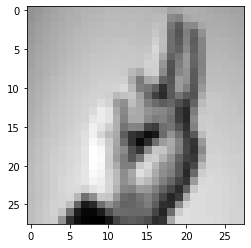

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


/home/roni/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
/home/roni/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


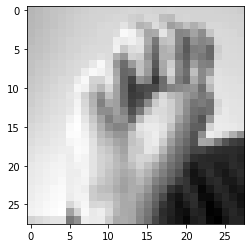

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/home/roni/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
/home/roni/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


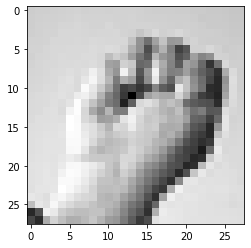

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/home/roni/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
/home/roni/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


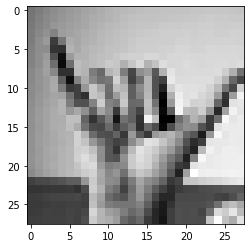

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


/home/roni/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
/home/roni/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


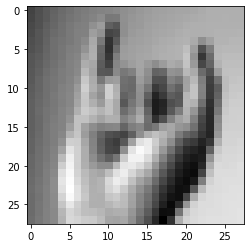

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


/home/roni/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
/home/roni/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=0.8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [37]:
for i in range(10):
    plt.imshow(X_test[i].reshape(28,28),cmap='gray')
    plt.show()
    print(y_test[i])
    print(binarize(model.predict(X_test[i].reshape(1,28,28,1)),0.8).astype(int)[0])